<a href="https://colab.research.google.com/github/cchhabra2004/MNIST_Model/blob/main/digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN: (samples, 28, 28, 1)
IMG_SIZE = 28
x_trainr = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,442 (556.41 KB)

 Trainable params: 142,442 (556.41 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Data augmentation with proper validation split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split=0.3,  # internal validation split
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Create training and validation generators
train_generator = datagen.flow(x_trainr, y_train, batch_size=32, subset='training')
val_generator = datagen.flow(x_trainr, y_train, batch_size=32, subset='validation')

In [5]:
# Train the model
model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 112s 83ms/step - accuracy: 0.7633 - loss: 0.7148 - val_accuracy: 0.9561 - val_loss: 0.1388
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 82ms/step - accuracy: 0.9592 - loss: 0.1291 - val_accuracy: 0.9672 - val_loss: 0.1087
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 105s 80ms/step - accuracy: 0.9690 - loss: 0.0963 - val_accuracy: 0.9722 - val_loss: 0.0920
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 142s 80ms/step - accuracy: 0.9756 - loss: 0.0755 - val_accuracy: 0.9752 - val_loss: 0.0785
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 142s 81ms/step - accuracy: 0.9798 - loss: 0.0661 - val_accuracy: 0.9707 - val_loss: 0.0995


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9854 - loss: 0.0447
Test loss: 0.035742685198783875
Test accuracy: 0.9884999990463257
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Prediction for first test image: 7


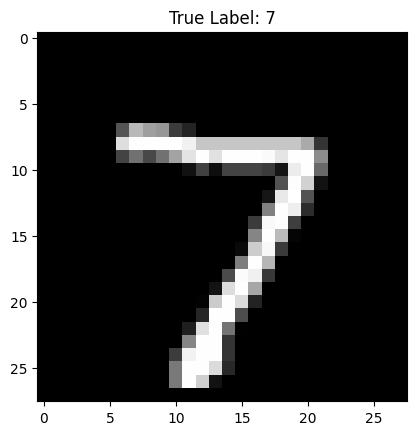

In [6]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Predict on a sample test image
predictions = model.predict(x_testr)
print("Prediction for first test image:", np.argmax(predictions[0]))

plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Label: {y_test[0]}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


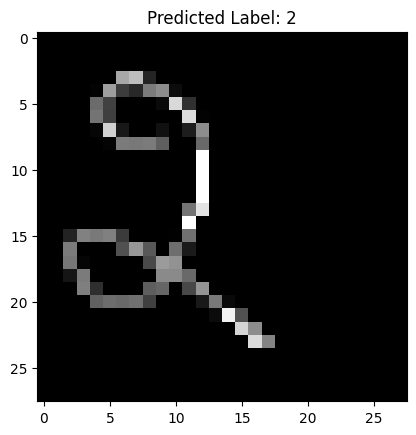

Prediction for external image: 2


In [7]:
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)  # Resize to 28x28
    img = cv2.bitwise_not(img)  # Invert colors if background is white
    img = tf.keras.utils.normalize(img, axis=1)  # Normalize
    img = img.reshape(-1, 28, 28, 1)  # Reshape for model
    return img

# Predict external image (change filename accordingly)
external_img = preprocess_image("2.png")
external_pred = model.predict(external_img)
predicted_label = np.argmax(external_pred)

plt.imshow(external_img[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

print("Prediction for external image:", predicted_label)